### Import packages

In [1]:
import sys
sys.path.append('../data_helpers/')
sys.path.append('../statistics/')
sys.path.append('../preprocess')
sys.path.append('../cluster/')

In [18]:
from twitter_data_helper import TwitterDataHelper
from reddit_data_helper import RedditDataHelper
from data_aggregator import DataAggregator
from statistics_aggregator import StatisticsAggregator
from text_cleaner import TextCleaner
from lda_cluster import LDACluster
from data_enhancer import DataOrganizer, SummarizeNER

In [19]:
import numpy as np
import pandas as pd
import json
import pickle
from time import time, sleep
from tqdm import tqdm

In [21]:
from text_cleaner import TextCleaner
text_cleaner = TextCleaner(filter_sentiment_words=True)

* [TextCleaner] Initializing...
* [TextCleaner] Loading SpaCy "en_core_web_md" corpus...
* [TextCleaner] Loading stopwords...
* [TextCleaner] Loading sentinent words...
--------------------------------------------------------------------------------------------------------------------


In [22]:
from gensim.corpora import Dictionary

### Get data

In [23]:
data_helper = DataAggregator()
date_range = ['2017-08-23', '2017-08-24']
df = data_helper.get_data(date_range=date_range)

In [24]:
df['source'].value_counts()

reddit     95
twitter    94
Name: source, dtype: int64

In [25]:
df[['source', 'created_at', 'author', 'text', 'url']]

,source,created_at,author,text,url
0,twitter,2017-08-23 14:41:26,arxiv_cscl,Google's Multilingual Neural Machine Translati...,http://arxiv.org/abs/1611.04558
1,twitter,2017-08-23 14:41:25,arxiv_cscl,Cold Fusion: Training Seq2Seq Models Together ...,http://arxiv.org/abs/1708.06426
2,twitter,2017-08-23 13:41:48,arxiv_cscl,A Batch Noise Contrastive Estimation Approach ...,http://arxiv.org/abs/1708.05997
3,twitter,2017-08-23 13:41:48,arxiv_cscl,A rule based algorithm for detecting negative ...,http://arxiv.org/abs/1708.06708
4,twitter,2017-08-23 13:41:47,arxiv_cscl,Long-Short Range Context Neural Networks for L...,http://arxiv.org/abs/1708.06555
5,twitter,2017-08-23 13:41:47,arxiv_cscl,"Golden Years, Golden Shores: A Study of Elders...",http://arxiv.org/abs/1708.06550
6,twitter,2017-08-23 13:41:46,arxiv_cscl,Handling Homographs in Neural Machine Translat...,http://arxiv.org/abs/1708.06510
7,twitter,2017-08-23 12:41:46,arxiv_cscl,The Argument Reasoning Comprehension Task http...,http://arxiv.org/abs/1708.01425
8,twitter,2017-08-23 12:41:46,arxiv_cscl,Google's Multilingual Neural Machine Translati...,http://arxiv.org/abs/1611.04558
9,twitter,2017-08-23 12:41:46,arxiv_cscl,A rule based algorithm for detecting negative ...,http://arxiv.org/abs/1708.06708


### Clean text

In [26]:
texts = df['text']

In [27]:
docs = text_cleaner.clean(texts)

0it [00:00, ?it/s]

* [TextCleaner] Cleaning text...


189it [00:00, 404.34it/s]


### Word Cloud (Show Top K words)
- K = vocabulary numbers / 2

In [30]:
from gensim.corpora import Dictionary
vocab = Dictionary(docs)

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=int(len(vocab)*0.5), background_color='white', width=600, height=300, max_font_size=50).generate(' '.join([' '.join(doc) for doc in docs]))

(-0.5, 599.5, 299.5, -0.5)

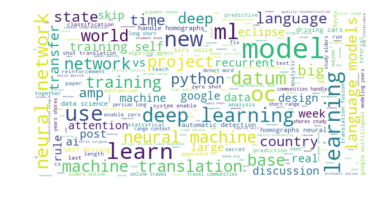

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## LDA - Topic Clustering

In [32]:
cluster = LDACluster(num_topics=10)
cluster.fit(docs)
cluster.model.print_topics()

* [LDA] Training model...


[(0,
  '0.034*"keras" + 0.022*"economic" + 0.022*"model" + 0.019*"science" + 0.019*"ml" + 0.019*"python" + 0.018*"business" + 0.018*"make" + 0.017*"student" + 0.017*"teach"'),
 (1,
  '0.027*"oc" + 0.025*"learning" + 0.019*"eclipse" + 0.017*"machine" + 0.015*"models" + 0.013*"vs" + 0.012*"temperature" + 0.012*"powerball" + 0.012*"app" + 0.011*"deep"'),
 (2,
  '0.035*"neural" + 0.028*"networks" + 0.024*"deep" + 0.019*"learning" + 0.019*"neural_networks" + 0.018*"machine" + 0.013*"time" + 0.013*"translation" + 0.013*"machine_translation" + 0.013*"long"'),
 (3,
  '0.037*"learn" + 0.036*"models" + 0.025*"language" + 0.023*"training" + 0.022*"transfer" + 0.021*"machine" + 0.018*"learning" + 0.015*"project" + 0.014*"base" + 0.013*"fusion"'),
 (4,
  '0.020*"oc" + 0.018*"word" + 0.017*"model" + 0.016*"use" + 0.014*"time" + 0.014*"base" + 0.014*"detection" + 0.013*"automatic" + 0.013*"rule" + 0.013*"persian"'),
 (5,
  '0.030*"learning" + 0.027*"use" + 0.019*"training" + 0.017*"deep" + 0.015*"dee

### Topic distribution

In [33]:
df['cluster'] = cluster.labels
df['cluster'].value_counts()

2    31
6    26
3    22
9    21
4    21
7    17
8    13
1    13
0    13
5    12
Name: cluster, dtype: int64

### Post type distribution

In [34]:
stats_helper = StatisticsAggregator(df)
sdf = stats_helper.get_stats()

In [35]:
sdf['type'].value_counts()

unknown link                          58
paper                                 43
twitter status                        19
subreddit: /r/MachineLearning         18
subreddit: /r/datascience             15
blog                                  13
subreddit: /r/learnmachinelearning    11
shortened-link                         3
subreddit: /r/BigDataJobs              2
dataset                                2
subreddit: /r/computervision           1
code                                   1
subreddit: /r/deeplearning             1
subreddit: /r/LanguageTechnology       1
subreddit: /r/MLQuestions              1
Name: type, dtype: int64

### Cross relation between post type and post sentiment

In [36]:
pd.crosstab(sdf.type,sdf.sentiment)

sentiment,neg,neu,pos
type,,,
blog,0,13,0
code,0,1,0
dataset,0,2,0
paper,3,40,0
shortened-link,0,2,1
subreddit: /r/BigDataJobs,0,2,0
subreddit: /r/LanguageTechnology,0,1,0
subreddit: /r/MLQuestions,0,1,0
subreddit: /r/MachineLearning,0,18,0


### Blog

In [37]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'blog'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

* Date: 2017-08-24
* Text: [D] My Year at Brain
* Link: http://colinraffel.com/blog/my-year-at-brain.html
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R] High Quality 3D Object Reconstruction from a Single Color Image
* Link: http://bair.berkeley.edu/blog/2017/08/23/high-quality-3d-obj-reconstruction/
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R] ML Model Ensembling with Fast Iterations - reproducible final prediction as a composite of predictions from individual ML algorithms
* Link: https://blog.dataversioncontrol.com/ml-model-ensembling-with-fast-iterations-91e8cad6a9b5
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: Correlations - world cereal production x population...
* Link: http://datasoa

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Code

In [38]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'code'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

* Date: 2017-08-23 17:18:12
* Text: CleverHans 2.0.0 is out: https://t.co/bfRyJ0GDXB Many thanks to all our contributors!
* Link: https://github.com/tensorflow/cleverhans/releases/tag/v2.0.0
-------------------------------------------------------------------------------------------------------------------


/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### News

In [39]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'news'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Paper

In [40]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'paper'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

* Date: 2017-08-24
* Text: [R] [1708.07120] Super-Convergence: Very Fast Training of Residual Networks Using Large Learning Rates
* Link: https://arxiv.org/abs/1708.07120
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R] [1708.04782] StarCraft II: A New Challenge for Reinforcement Learning
* Link: https://arxiv.org/abs/1708.04782
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R] [1708.06733] BadNets: Identifying Vulnerabilities in the Machine Learning Model Supply Chain
* Link: https://arxiv.org/abs/1708.06733
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R] [1708.06834] Skip RNN: Learning to Skip State Updates in Recurrent Neural Networks
* Link: https://arxiv.org/abs/1708.06834
-------------------

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Sentiment Distribution

In [41]:
sdf['sentiment'].value_counts()

neu    177
pos      8
neg      4
Name: sentiment, dtype: int64

### Positive posts

In [42]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['sentiment'] == 'pos'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

* Date: 2017-08-23 14:14:01
* Text: Find a @DonorsChoose project that inspires you, and our foundation will help you make a bigger impact:… https://t.co/9cImAAjzh1
* Link: https://twitter.com/i/web/status/900360483131113472
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-23 18:24:25
* Text: Care for some light reading? Learn more about the Google research &amp; publications presented at #kdd2017 last week! https://t.co/e2WqZ3OHMu
* Link: http://goo.gl/pSW4ND
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-24 03:40:25
* Text: Surprisingly stimulating to consider unpopular ideas abt political &amp; economic systems. Excerpted from… https://t.co/EjpMlPq0qf
* Link: https://twitter.com/i/web/status/900563421170606080
--------------------------------------------------------------------------------------------------------------

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Negative posts

In [43]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['sentiment'] == 'neg'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

* Date: 2017-08-23 22:18:23
* Text: [R] Genetic deep learning for lung cancer screening https://t.co/ZcTAHgBs3f
* Link: http://dlvr.it/Ph8SXP
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-23 13:41:48
* Text: A rule based algorithm for detecting negative words in Persian https://t.co/PFSSBYyAxj
* Link: http://arxiv.org/abs/1708.06708
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-23 12:41:46
* Text: A rule based algorithm for detecting negative words in Persian https://t.co/PFSSBYgZFL
* Link: http://arxiv.org/abs/1708.06708
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-23 00:41:35
* Text: A rule based algorithm for detecting negative words in Persian https://t.co/PFSSBYgZFL
* Link: http://arxiv.org/abs/1708.06708
---------------------

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### All posts ranked by "hotness"

In [44]:
for i, row in sdf.sort_values('hotness', ascending=False).iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*115)

* Date: 2017-08-24
* Text: Each week for the last few months, I bought 3 Powerball tickets for $6 and invested $6 into a Robo-Advisor App to compare return on investment [OC]
* Link: https://i.redd.it/83lzi108njhz.png
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-23 17:43:45
* Text: New Model X SUV now faster than a $500k Lamborghini https://t.co/J23AKNMnmV
* Link: https://twitter.com/dragtimes/status/899112325457874944
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-23 14:26:31
* Text: First picture of SpaceX spacesuit. More in days to follow. Worth noting that this actually works… https://t.co/5ZtqkKiTQX
* Link: https://www.instagram.com/p/BYIPmEFAIIn/
-------------------------------------------------------------------------------------------------------------------
* Date: 2017-08-23 21:16:45
* Text: A midnight amen

## Extract keywords (name entities) from text

In [46]:
se = SummarizeNER(sdf)

In [47]:
for i, phrase in enumerate(se.cleaned_phrases):
    if type(phrase) == tuple and phrase != 'N/A':
        print(i, phrase[0])

0 Google
8 Google
17 Google
22 Language Models
23 Automatic Detection of Fake News
24 Graph Neural Multi Document Summarization
25 Lexicon Integrated CNN Attention for Sentiment Analysis
26 Statistical Patterns in Written Language
27 Automatic Detection of Fake News
28 A Neural Network Approach for Mixing Language Models
29 Discovering Political Topics in Facebook Discussion
31 Memoryless Options and Option Observation Initiation
34 Automatic Detection of Fake News
35 Christian H
38 China Bitmain Google
39 Japan
45 Nice Waymo
46 Dan Ambrosi Google NYC
47 CleverHans
48 NASA
49 Walmart Google Express
50 Google
52 Waymo
55 Disneyland
58 ISS
59 Taylor Swift
61 Bckenstler
62 Learning to Transfer L T Learns
64 Siri Density Networks for Hybrid Unit Selection Synthesis Apple
65 Microsoft
66 Microsoft
70 Siri
71 Healthcare
72 Statistical Recurrent Unit
73 Machine
80 Apple ML Journal Siri s Voice Improving Acoustic Models
86 GAN
95 China India
102 Data Science and Machine Learning Bootcamp Jose 